# Analysis and Visualization of Crime in London City

## Backgrounder

`Crime `is a significant social issue in many minor cities around the world, including `London City`, the capital of England. Greater London is a densely populated metropolitan area, which includes various boroughs or administrative districts. Understanding crime trend in Greater London has important implications for security policies, law enforcement, and the quality of life of city residents.

In order to identify and address crime problems, crime data in London has been uploaded and shared with the public. This data includes information about the type of crime, the location of the crime, as well as the time and date the crime was reported. This data can provide valuable insights into crime patterns in the area.

## Understanding Dataset
In this case, we will perform visualization techniques using the `London Crime Data` dataset from 2008-2016. The completion dataset can be accesed [here](https://www.kaggle.com/datasets/jboysen/london-crime)

**Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from wordcloud import WordCloud, STOPWORDS

**Load Dataset**

In [2]:
url_london_crime = "../dataset/london_crime_by_lsoa.csv"
df_lc = pd.read_csv(url_london_crime)

**Top of Dataset**

In [3]:
df_lc.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


**Row and Column of Dataset**

In [4]:
df_lc.shape

(13490604, 7)

**Detail Information of column**

In [5]:
df_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Based on the information, here is an explanation of the dataset columns:

0. `lsoa_code` (object): This column represents the Lower Layer Super Output Area (LSOA) code, which is a geographic code used for statistical and administrative purposes in the United Kingdom.

1. `borough` (object): This column contains the name of the London borough where the crime was reported or occurred.

2. `major_category` (object): This column categorizes crimes into major categories. It specifies the broad type or category of the reported crime, such as "Violence Against the Person" or "Burglary."

3. `minor_category` (object): Within each major category, crimes are further categorized into minor categories. This column provides more specific details about the type of crime, such as "Harassment" or "Theft From Motor Vehicle"

4. `value` (int64): This column contains numerical values and represents the count or number of reported crimes for a particular combination of location, major category, minor category, year, and month.

5. `year` (int64): This column represents the year in which the crime was reported or occurred. It is stored as an object data type, which suggests that it might be in text format rather than a numerical format.

6. `month` (int64): This column represents the month in which the crime was reported or occurred. Similar to the 'year' column, it is also stored as an object data type, indicating that it might be in text format.

**Unique Value of column**

To obtain more information, let's explore the unique values in several columns

In [6]:
df_lc["borough"].unique()

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

In [7]:
df_lc["year"].unique()

array([2016, 2015, 2008, 2012, 2010, 2013, 2014, 2011, 2009])

In [8]:
df_lc["major_category"].unique()

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

In [9]:
df_lc["minor_category"].unique()

array(['Burglary in Other Buildings', 'Other violence',
       'Personal Property', 'Other Theft', 'Offensive Weapon',
       'Criminal Damage To Other Building', 'Theft/Taking of Pedal Cycle',
       'Motor Vehicle Interference & Tampering',
       'Theft/Taking Of Motor Vehicle', 'Wounding/GBH',
       'Other Theft Person', 'Common Assault', 'Theft From Shops',
       'Possession Of Drugs', 'Harassment', 'Handling Stolen Goods',
       'Criminal Damage To Dwelling', 'Burglary in a Dwelling',
       'Criminal Damage To Motor Vehicle', 'Other Criminal Damage',
       'Counted per Victim', 'Going Equipped', 'Other Fraud & Forgery',
       'Assault with Injury', 'Drug Trafficking', 'Other Drugs',
       'Business Property', 'Other Notifiable', 'Other Sexual',
       'Theft From Motor Vehicle', 'Rape', 'Murder'], dtype=object)

## Crimes per Year
---
### **Question** : Which year has the highest number of crime?

In [10]:
top3_year = df_lc.drop(["lsoa_code","major_category","minor_category", "borough"], axis=1)
top3_year = top3_year.set_index("month").groupby('year').sum()
top3_year = top3_year.sort_values(by="value", ascending=False).head(3)
top3_year

,value
year,
2008,738641
2012,737329
2016,736121


Based on the table output above, we can conclude that 2008 was the year with the highest number of crimes in London. 

Let's see value per month for each year.

In [11]:
df_top3 = df_lc.drop(["lsoa_code","major_category","minor_category","borough"], axis=1).set_index("year")
df_top3 = df_top3.loc[top3_year.index]
df_top3 = df_top3.sort_values(by="month")
df_top3 = pd.pivot_table(df_top3, values="value", aggfunc=np.sum, index="year", columns="month")
df_top3 = df_top3.T


/tmp/ipykernel_3447/3126475524.py:4: FutureWarning: The provided callable <function sum at 0x7fbd381032e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_top3 = pd.pivot_table(df_top3, values="value", aggfunc=np.sum, index="year", columns="month")


In [12]:
df_top3

year,2008,2012,2016
month,,,
1,65419,62436,58847
2,62626,56735,56697
3,61343,67537,59167
4,59640,58801,58637
5,62587,64344,63990
6,62290,62281,62262
7,64126,63280,65519
8,59959,62143,62666
9,58414,56912,61412


Output table above is the value of per month for top 3 year with the highest crimes. Next step we will visualize it with line plot.

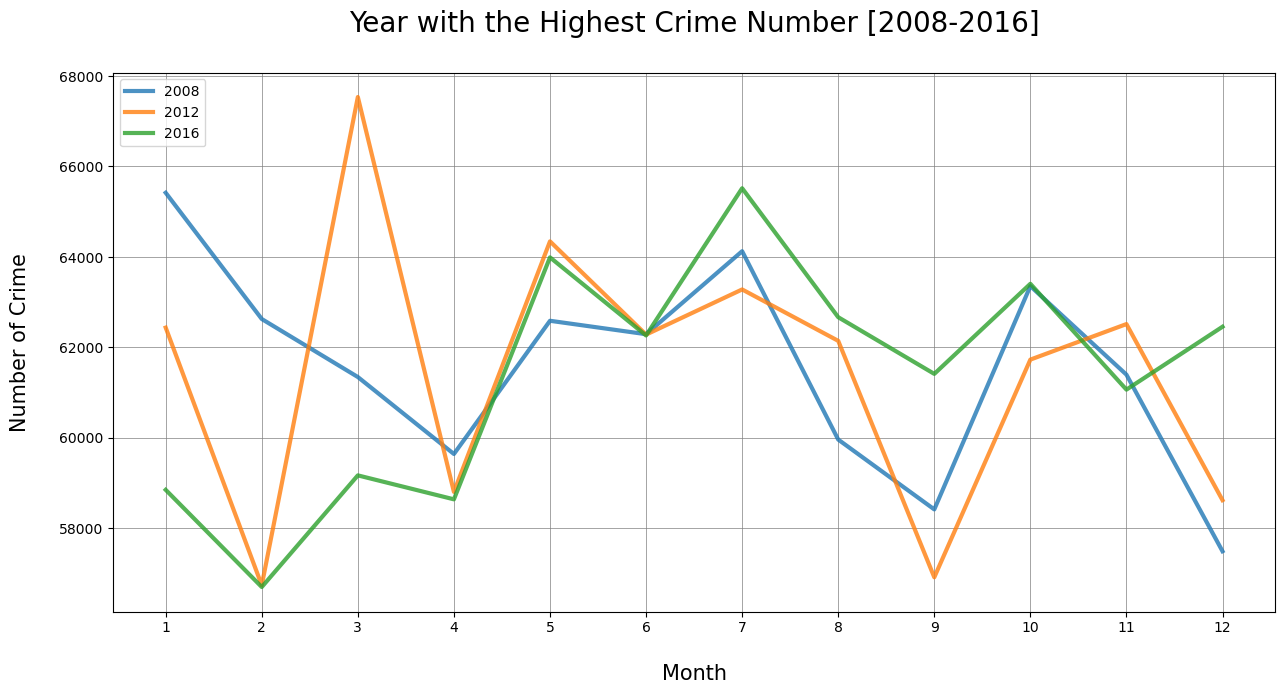

In [13]:
#LINE PLOT untuk melihat tren secara keseluruhan
df_top3.plot(kind="line",
             figsize=(15,7),
             stacked=False,
             alpha=0.8,
            linewidth=3,
            xticks=np.arange(1,13,1))
plt.title("Year with the Highest Crime Number [2008-2016]\n", fontsize=20)
plt.xlabel("\nMonth", fontsize=15),
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

Based on graphic, there is a monthly crime trend among the top 3 years with the highest number of crimes. The highest peak occurs in the third month of the year 2012, with a figure almost reaching 68,000.

## Crimes per Month

On previous section we had see value per month from the top 3 year with the highest number of crimes. Now, let's find out the number of crimes per month during 2008-2016.

### **Question** Which month did the number of crime cases in London reach its peak and valley?

In [14]:
month_crime = df_lc.drop(["lsoa_code","borough","major_category","minor_category","year"], axis=1)
month_crime = month_crime.groupby("month").sum()
month_crime = month_crime.reset_index()
month_crime

,month,value
0,1,530247
1,2,500537
2,3,551795
3,4,520648
4,5,552704
5,6,549041
6,7,563076
7,8,532784
8,9,522377
9,10,558252


The output table is the sum of value for each month during 2008 to 2016. Lets see the visualization of those data.

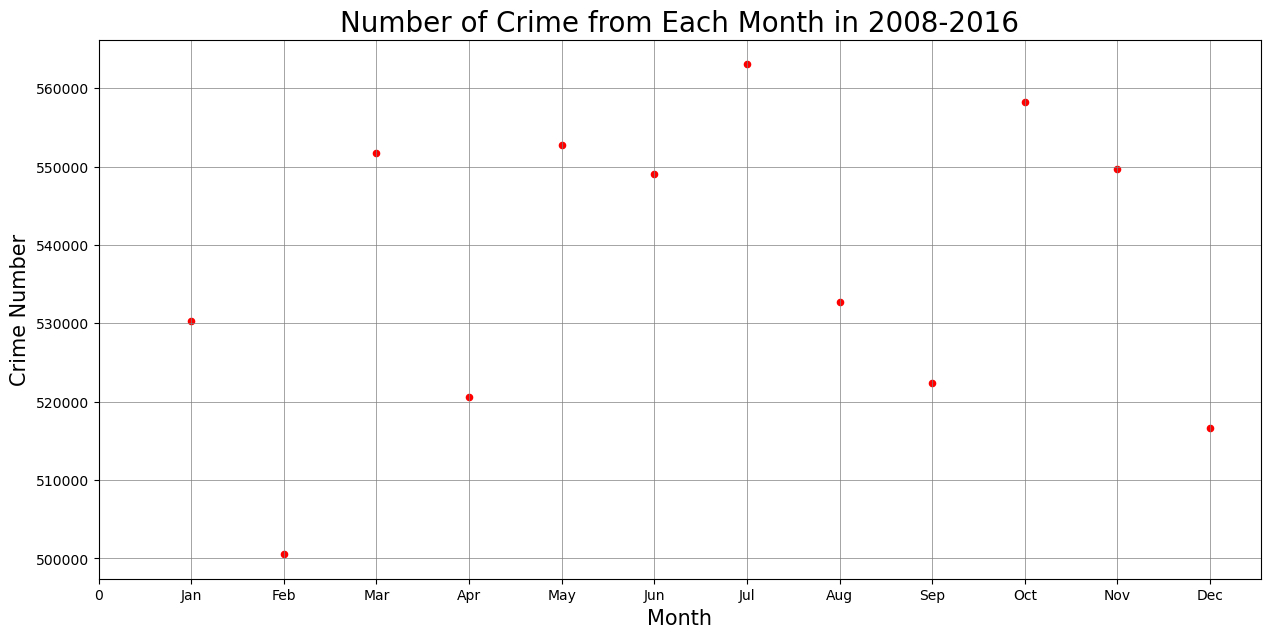

In [15]:
months = np.arange(len(month_crime["month"])+1)
name_of_months=['0','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

month_crime.plot(kind="scatter", x="month",y="value",figsize=(15,7), color="Red")
plt.title("Number of Crime from Each Month in 2008-2016", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Crime Number", fontsize=15)
plt.xticks(months, name_of_months)
plt.grid(color="grey", linewidth=0.5)
plt.show()

The graph above represents the total number of crimes that occurred in each month from 2008 to 2016. July can be seen to be the most terrible month with more than 560000 events, while the safest month is February which has the smallest crime number. 

## Crimes in Borough
---
First Lets explore the borough with highest number.

### **Question** : Which borough in London has the highest number of crimes during the years 2008-2016

In [16]:
top5_crime = df_lc.drop(["lsoa_code","major_category","minor_category","month"], axis=1)
top5_crime = top5_crime.set_index("year").groupby("borough").sum()
top5_crime = top5_crime.sort_values(by="value", ascending=False).head(5)
top5_crime

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024


Based on the output above, The Westminster is the borough in London with the highest number of crimes.

Now Let see the top 5 borough in visualization

In [17]:
df_top5 = df_lc.drop(["lsoa_code","major_category","minor_category","month"], axis=1).set_index("borough")
df_top5 = df_top5.loc[top5_crime.index]
df_top5 = pd.pivot_table(df_top5, values="value", aggfunc=np.sum, index="year", columns="borough")
df_top5

/tmp/ipykernel_3447/2540914630.py:3: FutureWarning: The provided callable <function sum at 0x7fbd381032e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_top5 = pd.pivot_table(df_top5, values="value", aggfunc=np.sum, index="year", columns="borough")


borough,Camden,Lambeth,Newham,Southwark,Westminster
year,,,,,
2008,32010,31717,29752,33470,47846
2009,31612,31225,28610,30623,48456
2010,31804,31671,30728,31320,48116
2011,33956,33224,27978,30723,54243
2012,31472,33473,30067,30737,59226
2013,28435,31868,27577,31128,53852
2014,27198,31765,28005,28912,47564
2015,29477,33164,29217,30260,47395
2016,29183,34071,30090,31636,48330


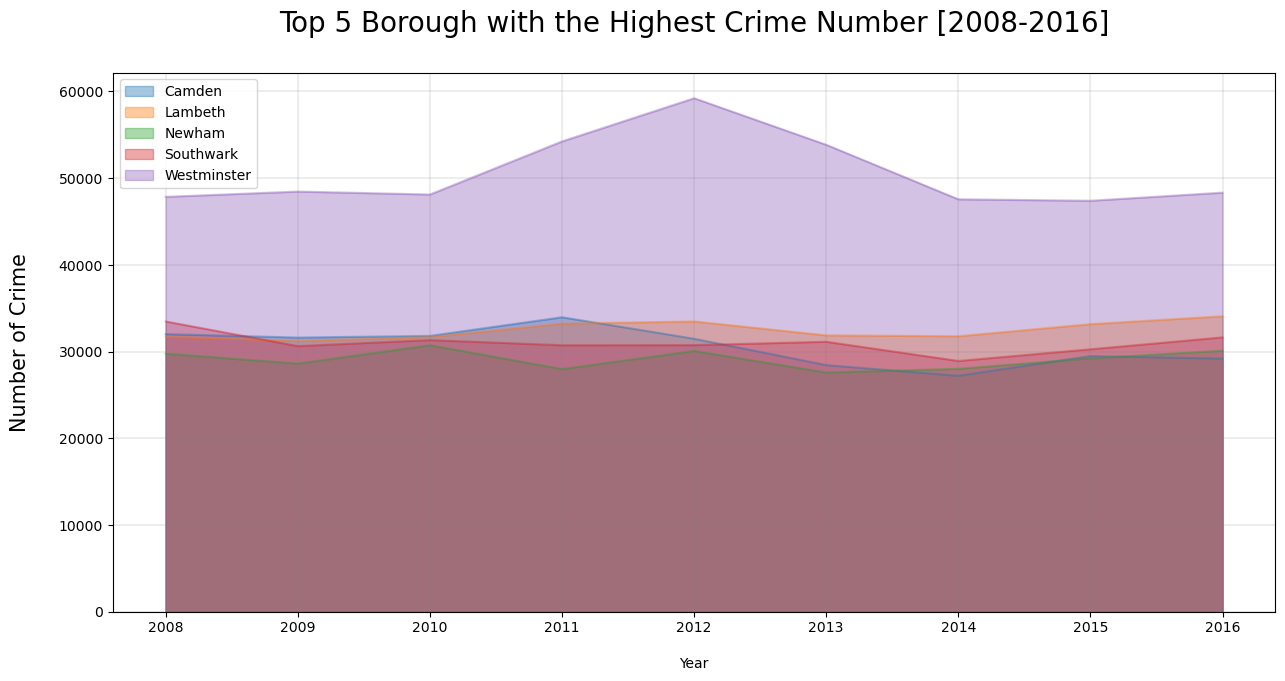

In [18]:
df_top5.plot(kind="area",
             figsize=(15,7),
             stacked=False,
             alpha = 0.4)
plt.title("Top 5 Borough with the Highest Crime Number [2008-2016]\n", fontsize=20)
plt.xlabel("\nYear")
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.2)
plt.legend(loc="upper left")
plt.show()

Based on the visualization, Westminster, which leads in crime numbers, appears to have a significant gap compared to the other four boroughs. Furthermore, it has not experienced a decrease since 2008 with the highest count in 2012.

### **Question** : How was the distribution of the frequency of crimes that occurred in the borough of London from 2008 to 2016?

We will define dataframe of boroughs and its value.

In [19]:
crime_frequency = df_lc.drop(["lsoa_code","major_category","minor_category","month","year"], axis=1)
crime_frequency = crime_frequency.groupby("borough").sum()
crime_frequency

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


In [20]:
count, bin_edges = np.histogram(crime_frequency)
print(count)
print(bin_edges)

[ 1  1  5  4 13  5  3  0  0  1]
[   780.   46204.8  91629.6 137054.4 182479.2 227904.  273328.8 318753.6
 364178.4 409603.2 455028. ]


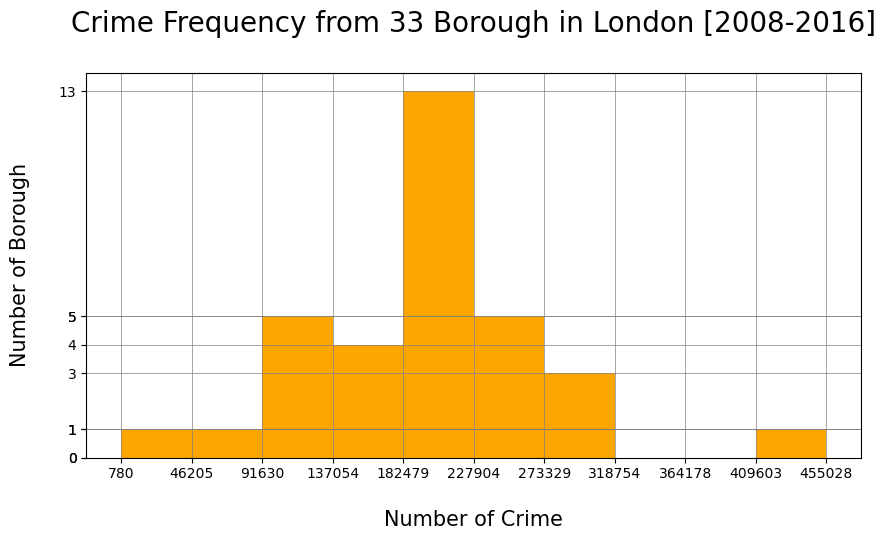

In [21]:
crime_frequency.plot(kind="hist",
                     figsize=(10,5),
                     xticks=bin_edges,
                     yticks=count,
                     legend=False,
                     color="orange")
plt.title("Crime Frequency from 33 Borough in London [2008-2016]\n", fontsize=20)
plt.xlabel("\nNumber of Crime", fontsize=15)
plt.ylabel("Number of Borough\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.show()

Based on the histogram above, it is observed that the highest frequency of crime occurrences falls in the range between 182,479 to 227,904, involving 13 boroughs. This indicates that there are 13 boroughs with crime counts ranging from 182,479 to 227,904 during the years 2008-2016. Additionally, the lowest frequency of the highest crime counts in between 409,603 and 455,028, indicating that one borough falls within this range. This is also similar to the range of 780 to 46,205 and the range of 46,205 to 91,630.

On previous section we identified the year with the highest number of crimes. Now let see number of crimes for each borough from those years.

### **Question** : How was the distribution the number of crimes across different boroughs during the specified years?

First lets see number of crimes in 2008 for Each Borough.

In [22]:
crime2008 = df_lc.drop(["lsoa_code","major_category","minor_category","month"],axis=1).set_index("year")
crime2008 = crime2008.loc[2008]
crime2008 = crime2008.groupby("borough").sum().sort_values(by="value")

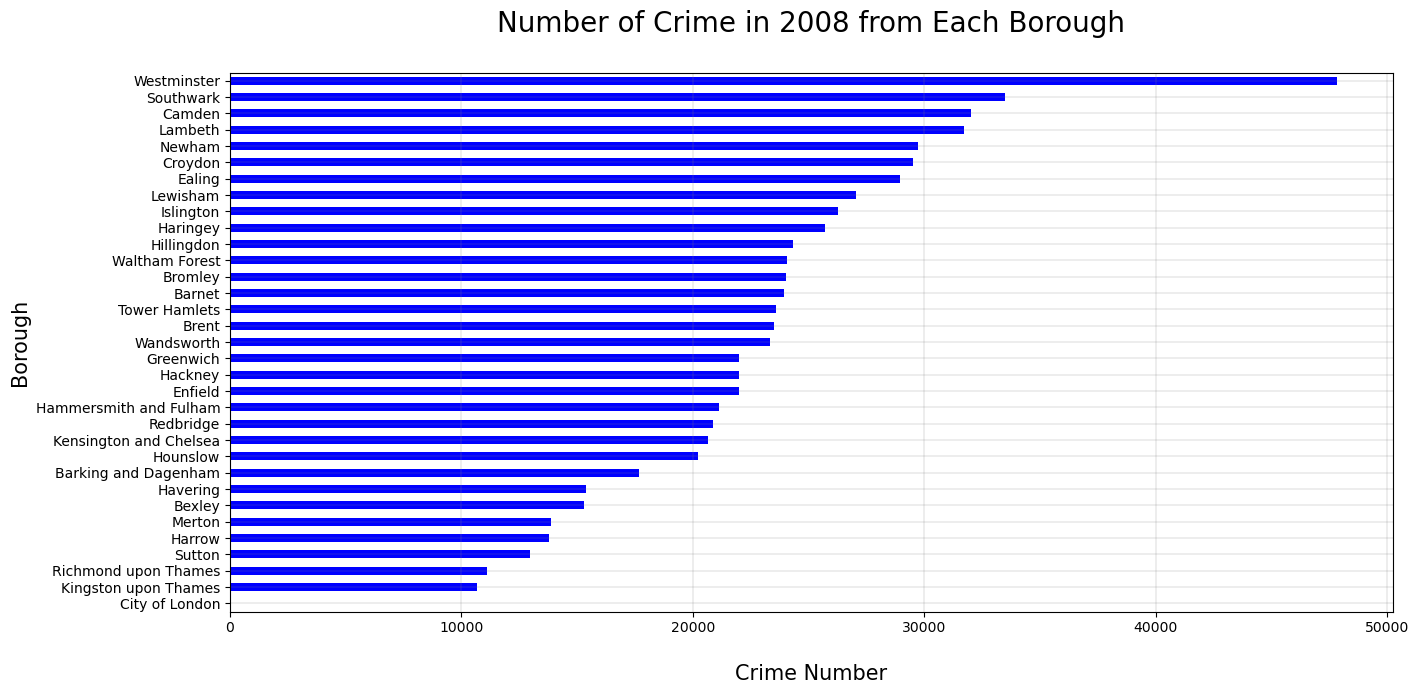

In [23]:
crime2008.plot(kind="barh",
               figsize=(15,7),
               legend=False,
              color="blue")
plt.title("Number of Crime in 2008 from Each Borough\n", fontsize=20)
plt.xlabel("\nCrime Number", fontsize=15)
plt.ylabel("Borough", fontsize=15)
plt.grid(color="grey", linewidth=0.2)
plt.show()

Based on the graph, it can be observed that the number of crimes each borough varies in 2008 Starting with the highest, Westminster stands out with a count nearly reaching 50,000. Southwark follows in the second position, with a count that has a noticeable gap in the 30,000s. This pattern continues with the remaining boroughs.

Now let's check the data out for the 2012 and 2016.

In [24]:
crime2012 = df_lc.drop(["lsoa_code","major_category","minor_category","month"],axis=1).set_index("year")
crime2012 = crime2012.loc[2012]
crime2012 = crime2012.groupby("borough").sum().sort_values(by="value")

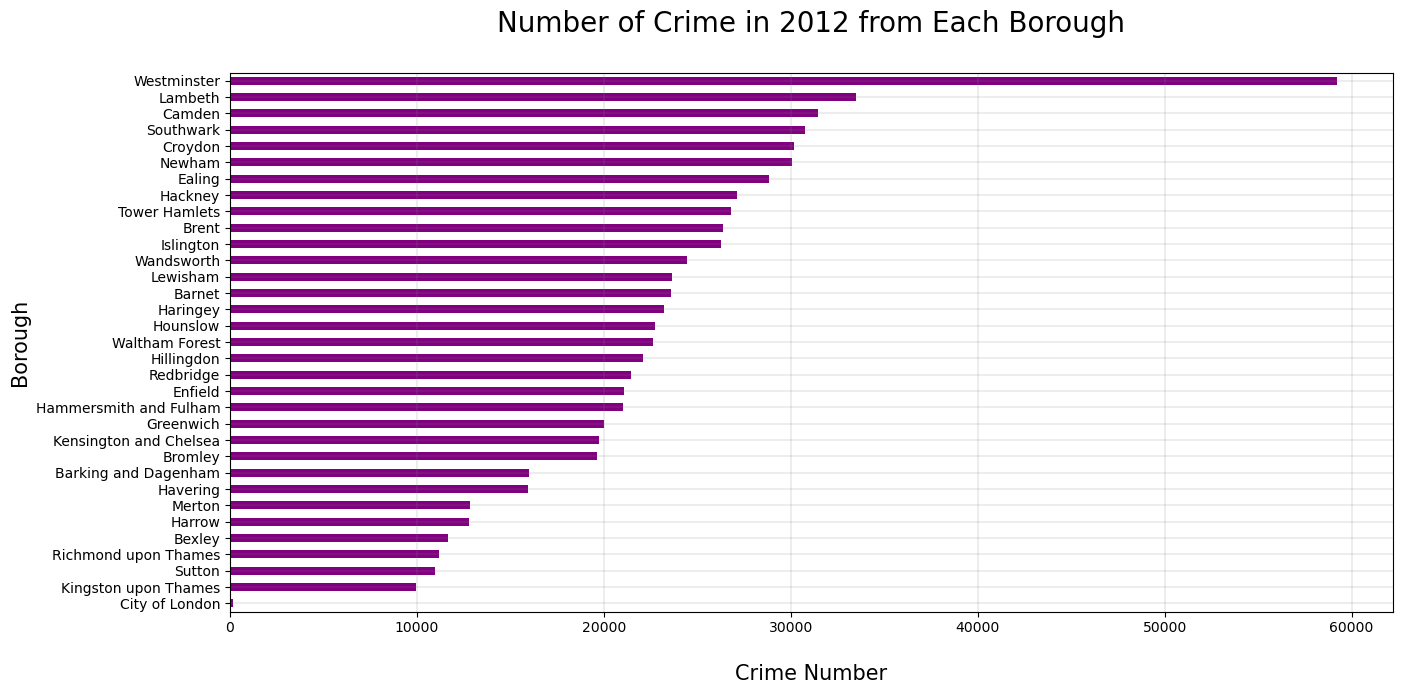

In [25]:
crime2012.plot(kind="barh",
               figsize=(15,7),
               legend=False,
              color="purple")
plt.title("Number of Crime in 2012 from Each Borough\n", fontsize=20)
plt.xlabel("\nCrime Number", fontsize=15)
plt.ylabel("Borough", fontsize=15)
plt.grid(color="grey", linewidth=0.2)
plt.show()

In the data for the year 2012, we also find Westminster with the highest number of crimes, which is even higher than in 2008, reaching nearly 60,000. In the second position, we have the borough of Lambeth with a count in the 30,000s, and next details can be observed in the graph.

Next step, we working on 2016 crimes.

In [26]:
crime2016 = df_lc.drop(["lsoa_code","major_category","minor_category","month"],axis=1).set_index("year")
crime2016 = crime2016.loc[2016]
crime2016 = crime2016.groupby("borough").sum().sort_values(by="value")

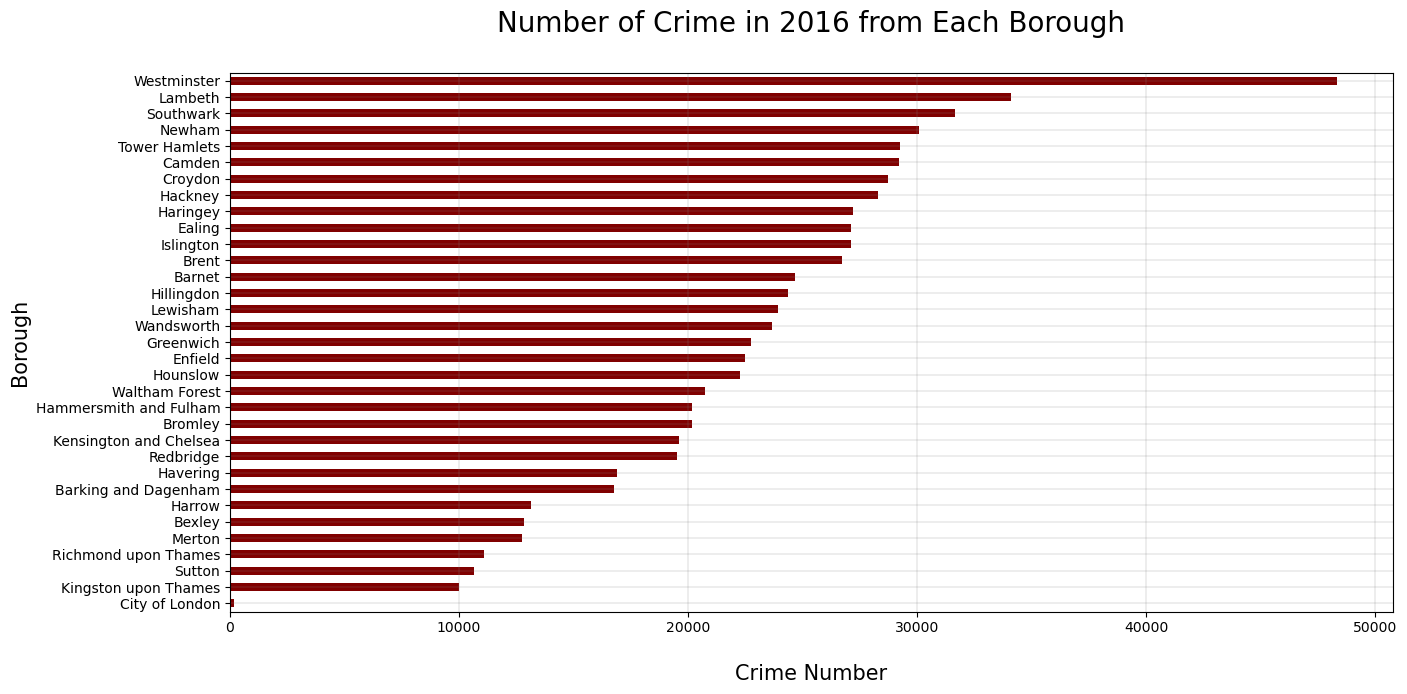

In [27]:
crime2016.plot(kind="barh",
               figsize=(15,7),
               legend=False,
              color="maroon")
plt.title("Number of Crime in 2016 from Each Borough\n", fontsize=20)
plt.xlabel("\nCrime Number", fontsize=15)
plt.ylabel("Borough", fontsize=15)
plt.grid(color="grey", linewidth=0.2)
plt.show()

In the data for the year 2016, we also find Westminster with the highest number of crimes reaching nearly 50,000. In the second position, we have the borough of Lambeth with a count in the 30,000s, followed by the Southwark borough and so on.

## Crimes Category that Occurs from 2008 - 2016
---

Lets explore the highest number on `major_category` 

### **Question** : What categories of crime/crime had the highest number during 2008-2016?

In [28]:
top5_major = df_lc.drop(["lsoa_code","borough","minor_category","month"], axis=1)
top5_major.set_index("year", inplace=True)
top5_major = top5_major.groupby("major_category").sum()
top5_major = top5_major.sort_values(by="value", ascending=False).head(5)
top5_major

,value
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765


Based on table output, Thieft and handling had the highest number with 2661861 counts followed by 4 others.

In [29]:
df_top5major = df_lc.drop(["lsoa_code","borough","minor_category","month"], axis=1).set_index("major_category")
df_top5major = df_top5major.loc[top5_major.index]
df_top5major = pd.pivot_table(df_top5major, values="value", aggfunc=np.sum, index="year", columns="major_category")
df_top5major

/tmp/ipykernel_3447/708436753.py:3: FutureWarning: The provided callable <function sum at 0x7fbd381032e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_top5major = pd.pivot_table(df_top5major, values="value", aggfunc=np.sum, index="year", columns="major_category")


major_category,Burglary,Criminal Damage,Drugs,Theft and Handling,Violence Against the Person
year,,,,,
2008,88092,91872,68804,283692,159844
2009,90619,85565,60549,279492,160777
2010,86826,77897,58674,290924,157894
2011,93315,70914,57550,309292,146901
2012,93392,62158,51776,334054,150014
2013,87222,56206,50278,306372,146181
2014,76053,59279,44435,279880,185349
2015,70489,62976,39785,284022,218740
2016,68285,64071,38914,294133,232381


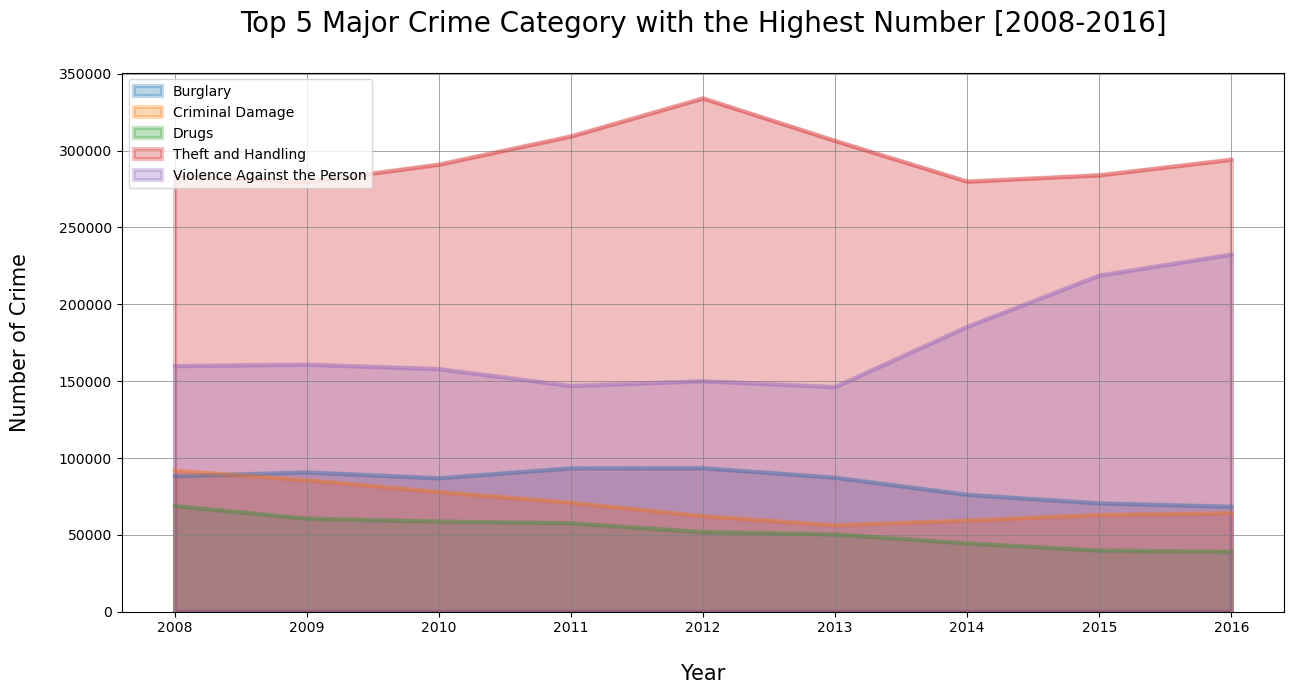

In [30]:
df_top5major.plot(kind="area", 
                  figsize=(15,7),
                 linewidth=3,
                 alpha=0.3,
                 stacked=False)
plt.title("Top 5 Major Crime Category with the Highest Number [2008-2016]\n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

From the graph we can see the trend of the top 5 crimes on major category, which looks stable and has not experienced a significant decrease. Even more, Violence Against the Person has continued to increase since 2013.

Let's take a look at the highest number on `minor_category` 

In [31]:
top5_minor = df_lc.drop(["lsoa_code","borough","major_category","month"], axis=1)
top5_minor.set_index("year", inplace=True)
top5_minor = top5_minor.groupby("minor_category").sum()
top5_minor = top5_minor.sort_values(by="value", ascending=False).head(5)
top5_minor

,value
minor_category,
Other Theft,980085
Theft From Motor Vehicle,569956
Burglary in a Dwelling,491282
Harassment,458124
Assault with Injury,451001


Based on table output, Other Theft had the highest number with 980085 counts followed by 4 others.

Let's visualize the output

In [32]:
df_top5minor = df_lc.drop(["lsoa_code","borough","major_category","month"], axis=1).set_index("minor_category")
df_top5minor = df_top5minor.loc[top5_minor.index]
df_top5minor = pd.pivot_table(df_top5minor, values="value", aggfunc=np.sum, index="year", columns="minor_category")
df_top5major

/tmp/ipykernel_3447/346217828.py:3: FutureWarning: The provided callable <function sum at 0x7fbd381032e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_top5minor = pd.pivot_table(df_top5minor, values="value", aggfunc=np.sum, index="year", columns="minor_category")


major_category,Burglary,Criminal Damage,Drugs,Theft and Handling,Violence Against the Person
year,,,,,
2008,88092,91872,68804,283692,159844
2009,90619,85565,60549,279492,160777
2010,86826,77897,58674,290924,157894
2011,93315,70914,57550,309292,146901
2012,93392,62158,51776,334054,150014
2013,87222,56206,50278,306372,146181
2014,76053,59279,44435,279880,185349
2015,70489,62976,39785,284022,218740
2016,68285,64071,38914,294133,232381


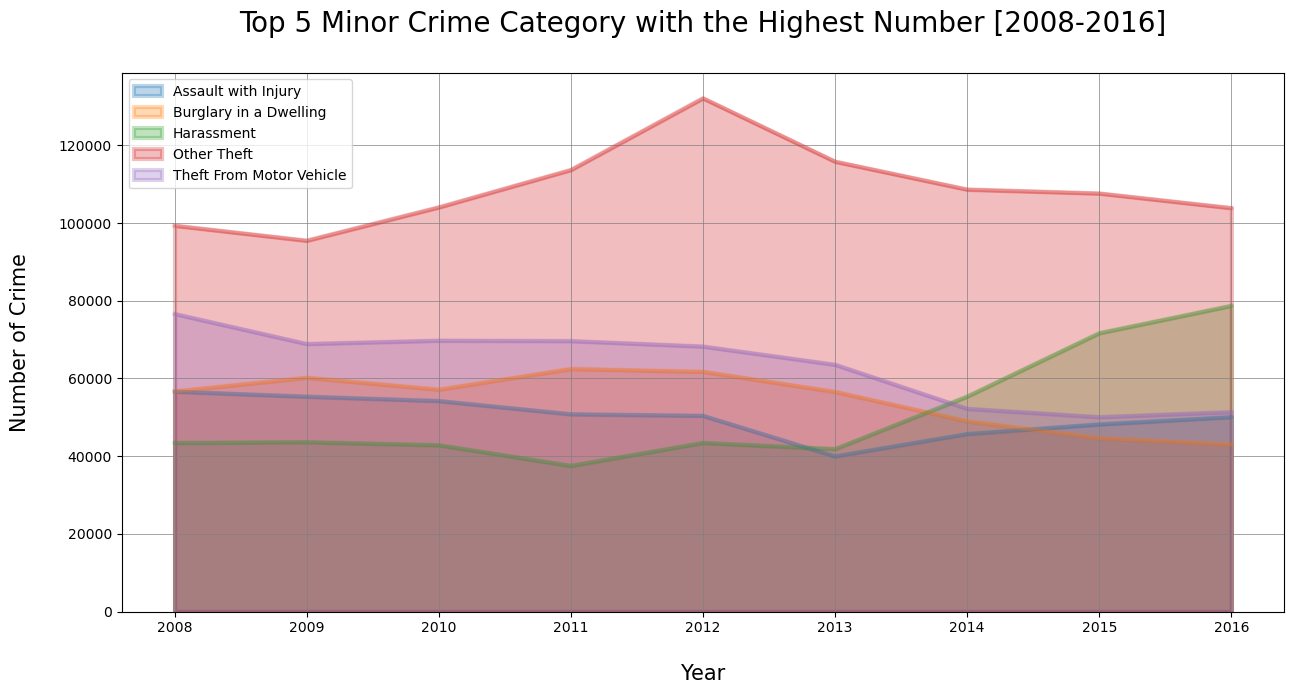

In [33]:
df_top5minor.plot(kind="area", 
                  figsize=(15,7),
                 linewidth=3,
                 alpha=0.3,
                 stacked=False)
plt.title("Top 5 Minor Crime Category with the Highest Number [2008-2016]\n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

Based on the graph we can see the trend of the top 5 crimes on minor category. `Other Theft` at the first place with a significant gap from 4 others and the peak occurred in 2012.

Now let's see the proportion from all major category. 

### **Question** : How was the proportion numbers of each crime in the `major category`?

In [34]:
major_proportion = df_lc.drop(["borough","lsoa_code","minor_category","year","month"], axis=1)
major_proportion = major_proportion.groupby("major_category").size()
major_proportion

major_category
Burglary                       1043604
Criminal Damage                2069172
Drugs                          1179468
Fraud or Forgery                236520
Other Notifiable Offences       776304
Robbery                         939384
Sexual Offences                 108108
Theft and Handling             3966300
Violence Against the Person    3171744
dtype: int64

We will using pie chart to visualize the propotion of major category.

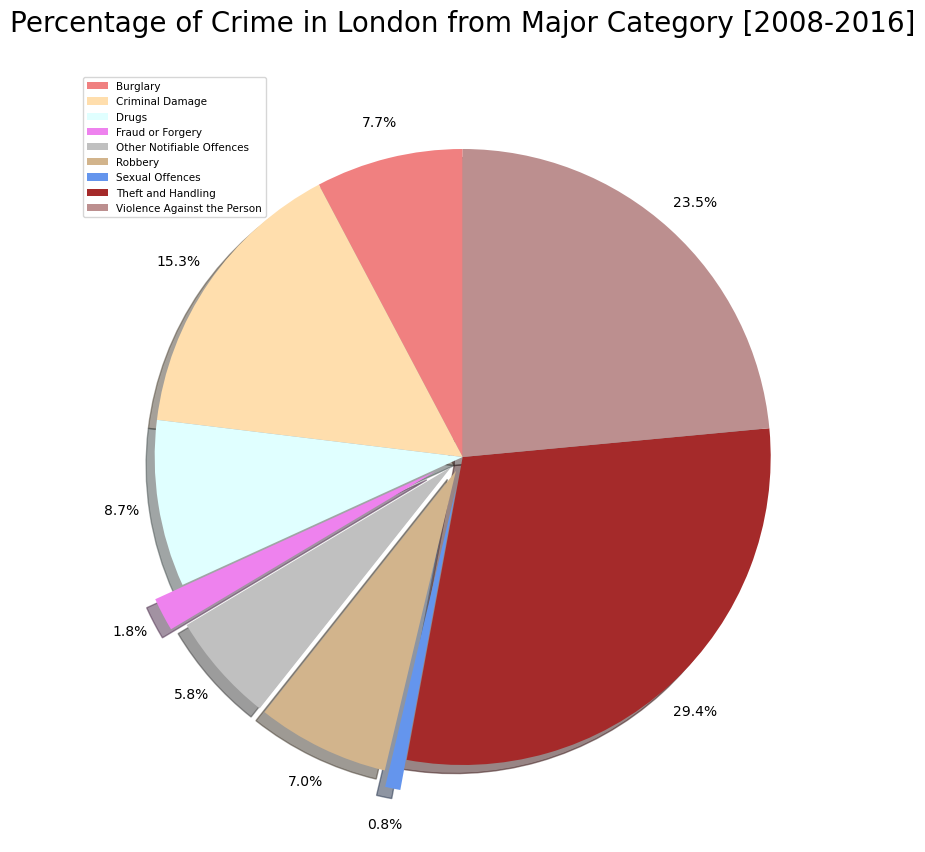

In [35]:
explode_list = [0,0,0,0.1,0.05,0.05,0.1,0,0]
color_list = ["lightcoral","navajowhite","lightcyan","violet","silver",
             "tan","cornflowerblue","brown","rosybrown"]
major_proportion.plot(kind="pie",
                     figsize=(20,10),
                     autopct="%1.1f%%",
                     startangle=90,
                     shadow=True,
                     labels=None,
                     pctdistance=1.12,
                     explode = explode_list,
                     colors=color_list)
plt.title("Percentage of Crime in London from Major Category [2008-2016]\n", fontsize=20, loc="center")
plt.legend(labels=major_proportion.index, loc="upper left", prop={"size":7.5})
plt.show()

The pie chart above is the percentage proportion of major crime categories in London during 2008-2016. The highest figures were the Theft and Handling category at 29.4% and Violence Against the Person at 23.5%. While Sexual Offences and Fraud or Forgery is the lowest number of cases have percentages of 0.8% and 1.8%.

Minor Category has a lot of unique value. Lets see the statictical distribution of all category.

#### Question: How was the statistical distribution of Minor Category data during 2008-2016?

In [36]:
totalCrimeEachType = df_lc.drop(["lsoa_code","borough","major_category","year","month"], axis=1).groupby("minor_category").sum()
totalCrimeEachType["value"].to_numpy()
totalCrimeEachType

,value
minor_category,
Assault with Injury,451001
Burglary in Other Buildings,263011
Burglary in a Dwelling,491282
Business Property,21295
Common Assault,413690
Counted per Victim,3840
Criminal Damage To Dwelling,154116
Criminal Damage To Motor Vehicle,265463
Criminal Damage To Other Building,66003


In [37]:
totalCrimeEachType.describe()

,value
count,32.000000
mean,201492.437500
std,225149.900652
min,268.000000
25%,19996.250000
50%,135456.000000
75%,317917.000000
max,980085.000000


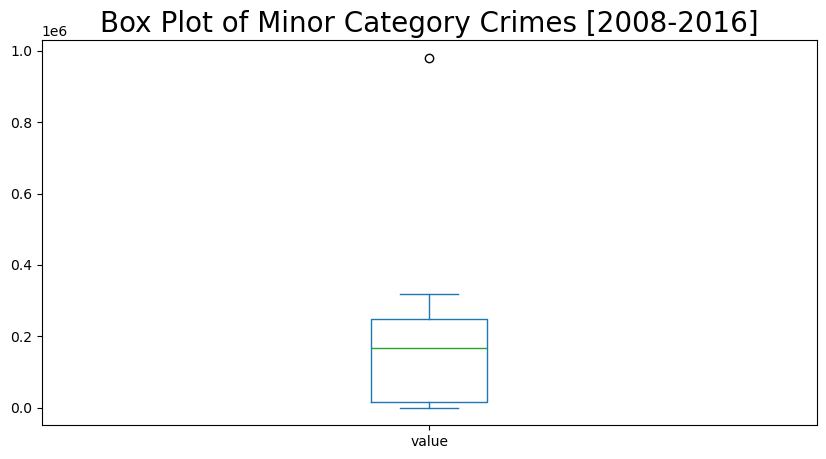

In [38]:
totalCrimeEachType.describe().plot(kind="box",
                figsize=(10,5))
plt.title("Box Plot of Minor Category Crimes [2008-2016]", fontsize=20)
plt.show()

Based on the box plot analysis, there is one significant outlier with a value larger than the other values. From the previous table, it is known that "Other Theft" has a value of 980,085, which is significantly higher than the overall average 201,492.

## London Crimes Map
---

On this section we will visualize the Crime rate from all boroughs on a London City Map.

In [39]:
df_map = df_lc[['borough','value']]
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 
londonCrimeMap = folium.Map(location=[51.507351,-0.127758],zoom_start=10)

In [47]:
londonCrimeMap.choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=df_map,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.3,
    legend_name='Crime rate in boroughs of london')
display(londonCrimeMap)

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## Word Cloud of Minor Category
---

In this section We will use word Cloud to visualize the word of Crimes based on it's value. It will generate the loop of word based on its value. The highest value will had the biggest display. We will visualize the Minor Category from top of boroughs, Westminster.

In [43]:
data_minor = df_lc[['minor_category', 'value']].groupby('minor_category').agg({'value': 'sum'})
data_minor.head()

,value
minor_category,
Assault with Injury,451001
Burglary in Other Buildings,263011
Burglary in a Dwelling,491282
Business Property,21295
Common Assault,413690


In [44]:
data_wm = df_lc[['year', 'borough', 'minor_category', 'value']].loc[(df_lc['year']==2016) & (df_lc['borough']=='Westminster')]
data_wm.head()

,year,borough,minor_category,value
227,2016,Westminster,Theft From Motor Vehicle,6
700,2016,Westminster,Common Assault,1
798,2016,Westminster,Offensive Weapon,0
972,2016,Westminster,Motor Vehicle Interference & Tampering,0
1538,2016,Westminster,Burglary in a Dwelling,0


Let's simplify the word of minor category.

In [45]:
data_wm['minor_category'] = data_wm['minor_category'].replace(
    ['Burglary in Other Buildings', 'Other violence',
       'Personal Property', 'Other Theft', 'Offensive Weapon',
       'Criminal Damage To Other Building', 'Theft/Taking of Pedal Cycle',
       'Motor Vehicle Interference & Tampering',
       'Theft/Taking Of Motor Vehicle', 'Wounding/GBH',
       'Other Theft Person', 'Common Assault', 'Theft From Shops',
       'Possession Of Drugs', 'Harassment', 'Handling Stolen Goods',
       'Criminal Damage To Dwelling', 'Burglary in a Dwelling',
       'Criminal Damage To Motor Vehicle', 'Other Criminal Damage',
       'Counted per Victim', 'Going Equipped', 'Other Fraud & Forgery',
       'Assault with Injury', 'Drug Trafficking', 'Other Drugs',
       'Business Property', 'Other Notifiable', 'Other Sexual',
       'Theft From Motor Vehicle', 'Rape', 'Murder'],
    
    ['Burglary', 'Violence',
       'Personal Property', 'Theft', 'Offensive',
       'Damage', 'Theft',
       'Interference&Tampering',
       'Theft', 'Wounding/GBH',
       'OtherTheft', 'Assault', 'Theft_Shops',
       'Drugs', 'Harassment', 'Handling',
       'Damage', 'Burglary',
       'Damage', 'OtherCriminalDamage',
       'Victim', 'GoingEquipped', 'FraudForgery',
       'Assault', 'Drug Trafficking', 'Other Drugs',
       'Business Property', 'Other Notifiable', 'Other Sexual',
       'Theft From Motor Vehicle', 'Rape', 'Murder']
)
data_wm.head()

,year,borough,minor_category,value
227,2016,Westminster,Theft From Motor Vehicle,6
700,2016,Westminster,Assault,1
798,2016,Westminster,Offensive,0
972,2016,Westminster,Interference&Tampering,0
1538,2016,Westminster,Burglary,0


Now we will generate the loop of word as much as it's number value.

In [46]:
data_wm['word'] = (data_wm['minor_category'] + (" ")) * data_wm['value']
data_wm.head()

,year,borough,minor_category,value,word
227,2016,Westminster,Theft From Motor Vehicle,6,Theft From Motor Vehicle Theft From Motor Vehi...
700,2016,Westminster,Assault,1,Assault
798,2016,Westminster,Offensive,0,
972,2016,Westminster,Interference&Tampering,0,
1538,2016,Westminster,Burglary,0,


Then, we merge all of value from 'word' column and put it on a List

In [ ]:
minor_list = data_wm['word'].values.tolist()
minor_str = ""
#print(major_str.join(major_list)) 

for value in major_list:
    if value == "":
        minor_str = minor_str
    else:
        minor_str += value

minor_list2 = minor_str.split()
minor_list2 = sorted(minor_list2)
word_str = ""

for value in minor_list2:
    word_str += value + (" ")


& & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & Assault Assault Assault Assault Assault Assault Assault Assault Assault Assault Assault Assault Assault Assault Assault Assault Assault As

Now, we will visualize the list.

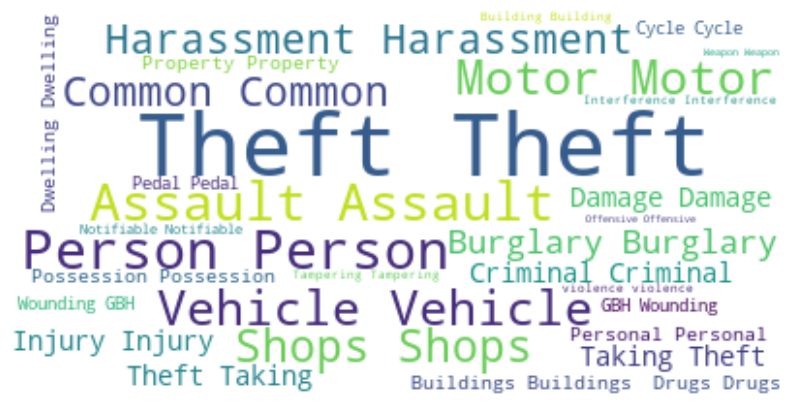

In [ ]:
minor_wc = WordCloud(
    background_color="white",
    max_words=5000,
    stopwords=STOPWORDS
)
minor_wc.generate(word_str)

plt.figure(figsize=(10,6))
plt.imshow(major_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Based on the picture, Theft is the biggest display, it indicates the Theft is the most word often appear. We can conlude Theft is the most crimes occured in Westminster, London City.

## Conclusion
---

Based on the analysis and visualization of the data conducted:

1. `Crime Trend`: The crime trend in London shows fluctuations throughout the years 2008-2016. It's observed that the year 2012 had the highest crime rate, especially in March. Despite monthly variations, crime rates in London do not show a significant decrease over time.

2. `Crime Patterns by Borough`: Westminster stands out as the area with the highest crime rate, significantly differing from other boroughs, especially in 2012. Lambeth and Southwark also have relatively high crime rates.

3. `Crime Categories`: The largest crime categories are Theft and Handling, and Violence Against the Person. Financial-related crimes and sexual offenses have smaller proportions within the total crimes in London.

4. `Outliers and Specific Crime Categories`: "Other Theft" is a category with the highest outlier value, indicating a significant difference in crime rates compared to other categories.

5. `Stability in Crime Categories`: The five major crime categories show stability in their numbers and do not experience significant decreases. Violence Against the Person, in fact, continues to rise since 2013.

6. `Geographical Visualization`: Westminster stands out as the center of the highest crimes, followed by Lambeth and Southwark. This visualization illustrates crime patterns across different regions of London.

7. `Frequent Words`: Based on the Word Cloud analysis, the most frequently occurring word related to crime categories is `theft.`

In conclusion, London faces significant security challenges, especially in areas like Westminster, Lambeth, and Southwark. Despite monthly and yearly fluctuations in crime rates, the stability in certain crime categories, such as theft, indicates the need for special attention from law enforcement agencies. Law enforcement efforts and crime prevention measures should be continuously enhanced, especially in areas with high crime rates.